<a href="https://colab.research.google.com/github/PaulNjinu254/Logistic-Regression-Series/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0: Training Loss = 0.6931
Iteration 100: Training Loss = 0.6304
Iteration 200: Training Loss = 0.5803
Iteration 300: Training Loss = 0.5374
Iteration 400: Training Loss = 0.5005
Iteration 500: Training Loss = 0.4685
Iteration 600: Training Loss = 0.4406
Iteration 700: Training Loss = 0.4162
Iteration 800: Training Loss = 0.3948
Iteration 900: Training Loss = 0.3757
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


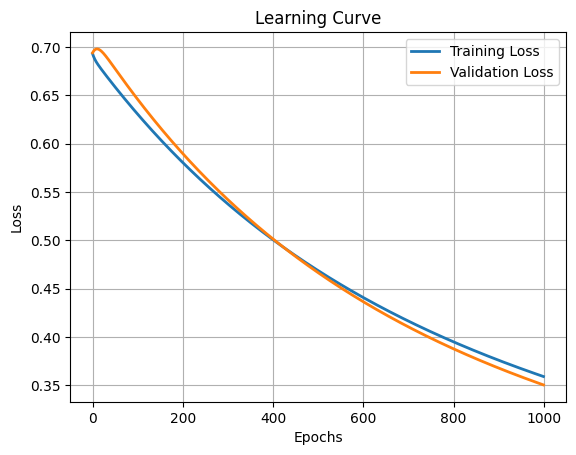

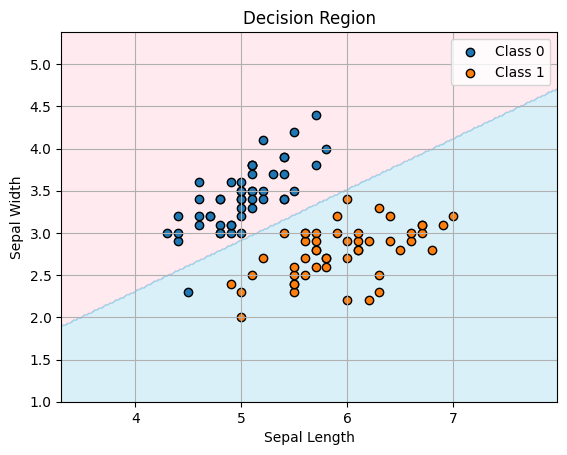

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib.colors import ListedColormap
import pickle

class ScratchLogisticRegression():
    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False, lam=0.1):
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lam = lam
        self.theta = None
        self.loss = []
        self.val_loss = []

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def _logistic_hypothesis(self, X):
        return self._sigmoid(X @ self.theta)

    def _loss_func(self, pred, y):
        m = y.shape[0]
        error = -np.sum(y * np.log(pred + 1e-15) + (1 - y) * np.log(1 - pred + 1e-15))
        reg_term = self.lam / (2 * m) * np.sum(self.theta[1:] ** 2)  # Exclude bias from regularization
        return (error / m) + reg_term

    def _gradient_descent(self, X, y):
        m = X.shape[0]
        pred = self._logistic_hypothesis(X)
        error = pred - y
        grad = (X.T @ error + self.lam * np.r_[[[0]], self.theta[1:]]) / m  # Don't regularize theta[0]
        self.theta -= self.lr * grad

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        if self.bias:
            X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
            if X_val is not None:
                X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
        self.theta = np.zeros((X_train.shape[1], 1))
        y_train = y_train.reshape(-1, 1)
        if y_val is not None:
            y_val = y_val.reshape(-1, 1)

        for i in range(self.num_iter):
            pred = self._logistic_hypothesis(X_train)
            self._gradient_descent(X_train, y_train)
            loss = self._loss_func(pred, y_train)
            self.loss.append(loss)

            if X_val is not None:
                pred_val = self._logistic_hypothesis(X_val)
                val_loss = self._loss_func(pred_val, y_val)
                self.val_loss.append(val_loss)

            if self.verbose and i % 100 == 0:
                print(f'Iteration {i}: Training Loss = {loss:.4f}')

    def predict_proba(self, X):
        if self.bias:
            X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self._logistic_hypothesis(X)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def save_weights(self, filename='logistic_weights.npz'):
        np.savez(filename, theta=self.theta)

    def load_weights(self, filename='logistic_weights.npz'):
        self.theta = np.load(filename)['theta']

# Load Iris dataset and select two classes and two features
iris = load_iris()
X = iris.data[:100, :2]  # Sepal length and sepal width
y = iris.target[:100]    # Class 0 (setosa) and 1 (versicolor)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
slr = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=True, lam=0.1)
slr.fit(X_train, y_train, X_test, y_test)

# Predictions
y_pred = slr.predict(X_test)
y_proba = slr.predict_proba(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

# Plot loss curve
plt.plot(slr.loss, label='Training Loss', linewidth=2)
plt.plot(slr.val_loss, label='Validation Loss', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot decision region
def decision_region(X, y, model):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['pink', 'skyblue']))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0', edgecolor='k')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1', edgecolor='k')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('Decision Region')
    plt.legend()
    plt.grid(True)
    plt.show()

decision_region(X, y, slr)

# Save and load weights
slr.save_weights()
slr.load_weights()
